# Diferenciación numérica
## Ejercicio 2

Realizar una gráfica de $log\left(error\,relativo\right)$ vs $log\left(h\right)$ (h en el eje horizontal) para aproximar la segunda derivada de: $f(x)=e^{-x}$ en $x=1$ con $h \in \{10^{-16}, 10^{-14}, \dots , 10^{-1}\}.$ Valor a aproximar: $f^{(2)}(1) = e^{-1}$.

El h óptimo es 1e-05, en escala logarítmica -11.512925464970229.


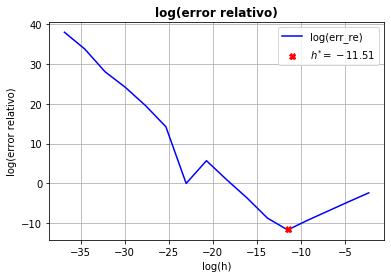

In [138]:
from numpy import absolute, exp, log
import numpy as np
import matplotlib.pyplot as plt

# ajustar precision de numpy (Ver pag. 188 Kiusellas sobre errores en aproxs.)
np.set_printoptions(precision=16) # Ajustando la precisión del entorno de numpy


h = np.arange(16.0) - 16 # crear vector de hs
h_vecI = 10**h
h_vec = np.flip(h_vecI) # invertir el orden del vector
#h_vec = np.around(h_vec) # mayor precision

# Funciones de approx de Taylor para segundas derivadas hacia adel.
def dif_2da_adel(x, f, h):
    a = -(x+2*h)        # Note que para este ejemplo lo ajusté para exp(-x)
    b = -(x+h)          # Consultar formas más eficientes de hacerlo
    c = -(x)
    dif_adel_2da = (f(a)-2*f(b)+f(c))/(h**2)
    return dif_adel_2da
# Computo del error relativo
def err_re(p, p_star):
    re = absolute(p - p_star)/absolute(p_star)
    return re

# Podemos ver qué h es el óptimo para esta aproximación
# (su índice en el vector de errores)
hop_dff = h_vec[vec_er_dff.argmin()]
print(f"El h óptimo es {hop_dff}, en escala logarítmica {log(hop_dff)}.")

# Crear vectores de aproximación de derivadas en x = 1
f_in = exp
x_eval = 1
vec_dff = dif_2da_adel(x_eval, f_in, h_vec)# Segundas derivadas
# Crear vectores de errores relativos con p_star = exp(-1)
p_s_dff = exp(-1)
vec_er_dff = err_re(vec_dff, p_s_dff)

# Gráfica
plt.plot(log(h_vec), log(vec_er_dff),'b-')
plt.xlabel('log(h)'); plt.ylabel('log(error relativo)')
plt.title('log(error relativo)',fontweight="bold")
# mostrar el h óptimo:
plt.plot(log(hop_dff), log(hop_dff), 'Xr')
plt.legend(('log(err_re)','$h^{*} = -11.51$'), loc=0)

plt.grid(True)
plt.show()
#input('End')

## Implementación ejemplo (Kiusalaas, pag. 188)

Comparar con ejemplo de Kiuselas lo siguiente:
------------------------------
El vector de segundas derivadas centradas (aproximadas) es: 
 
[0.3806090967 0.371029414  0.3686649207 0.3680756854 0.3679284944
 0.367891704  0.3678825068 0.3678802076 0.3678796328 0.367879489 ]
El vector de errores relativos es: 
 
[3.4602791377e-02 8.5625137661e-03 2.1351546102e-03 5.3344712407e-04
 1.3334044469e-04 3.3333777877e-05 8.3333612436e-06 2.0833360222e-06
 5.2083084852e-07 1.3012156288e-07]
------------------------------


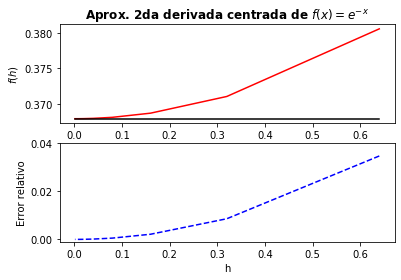

In [121]:
from numpy import absolute, exp, log
import numpy as np
import matplotlib.pyplot as plt


# ajustar precision de numpy
np.set_printoptions(precision=10)
h = np.array([0.64, 0.32, 0.16, 0.08, 0.04, 0.02, 0.01, 0.005, 0.0025, 0.00125])

def dif_2da_cen(x, f, h):
    a = -(x+h)
    b = -(x)
    c = -(x-h)
    dif_cen_2da = (f(a)-2*f(b)+f(c))/(h**2)
    return dif_cen_2da
# Computo del error relativo
def err_re(p, p_star):
    re = absolute(p - p_star)/absolute(p_star)
    return re
# Crear vectores de aproximación de derivadas en x = 1
f_in = exp
x_eval = 1
vec_dff = dif_2da_cen(x_eval, f_in, h)# Segundas derivadas
# Crear vectores de errores relativos con p_star = exp(-1)
p_s_dff = exp(-1)
vec_er_dff = err_re(vec_dff, p_s_dff)


print('Comparar con ejemplo de Kiuselas lo siguiente:'); print('--'*15)
print('El vector de segundas derivadas centradas (aproximadas) es: '); print(' ')
print(vec_dff)
print('El vector de errores relativos es: '); print(' ')
print(vec_er_dff); print('--'*15)

# Gráfica
plt.subplot(2,1,1)
plt.plot(h, vec_dff, 'r-')
plt.plot(h, exp(-1) + h*0, 'k-')
plt.xlabel('h'); plt.ylabel('$f''(h)$')
plt.title('Aprox. 2da derivada centrada de $f(x)=e^{-x}$',fontweight="bold")

plt.subplot(2,1,2)
plt.plot(h, vec_er_dff, 'b--')
plt.xlabel('h'); plt.ylabel('Error relativo')
axes = plt.gca()
axes.set_ylim([-0.001,0.04])

plt.grid(False)
plt.show()

# En este ejemplo por las magnitudes pareciera que lo que dice la teoría es correcto,
# En torno a h más pequeños disminuye el error. ¿Por qué?